In [1]:
import sys
sys.path.append('../')  # Ajuste o caminho conforme a necessidade

In [2]:
from src.vectorizer import ProductVectorizer
from data.data_utils import get_dataset
from experiment_manager.experiment_manager import ExperimentManager

In [3]:
# Ou, especificando o nome do conjunto de dados
dataset = get_dataset('retailpt-br')
#dataset = get_dataset('demo')
dataset.head()

,nm_item,segmento,subsegmento,categoria,subcategoria,id_product,nm_product
0,APRESUNTADO REZENDE PEC KG,1-BENS DE CONSUMO,1-ALIMENTOS,3-FRIOS E LATICINIOS,6-EMBUTIDOS,61.0,APRESUNTADO
1,CARNE SUIN ESPINHACO KG,1-BENS DE CONSUMO,1-ALIMENTOS,1-ACOUGUE E PEIXARIA,1-ACOUGUE,4.0,CARNE SUINA
2,"WHISKY WHITE 1L, HORSE TRAD, .",1-BENS DE CONSUMO,3-BEBIDAS,18-BEBIDAS ALCOOLICAS,56-DESTILADOS,490.0,WHISKY
3,"WHISKY JOHNN WALKER 1L UN, RED LABEL, .",1-BENS DE CONSUMO,3-BEBIDAS,18-BEBIDAS ALCOOLICAS,56-DESTILADOS,490.0,WHISKY
4,"WHISKY JOHNNIE WALKER 1L, BLACK LAB, .",1-BENS DE CONSUMO,3-BEBIDAS,18-BEBIDAS ALCOOLICAS,56-DESTILADOS,490.0,WHISKY


In [29]:
X = dataset['nm_item'].values
y = dataset['nm_product'].values

In [3]:
# Inicializando o ProductVectorizer
classifier = ProductVectorizer()
params = {
    'method': ['binary', 'termfrequency', 'tfidf'],
    'ngram_range': [(1, 1), (1, 2)],
    'norm': [None, 'l2']
}

In [4]:
# Instanciando a ExperimentManager
db_path = '../dbs/dadosartigo2.db'  # Ajuste o caminho para o seu banco de dados
project_name = 'Artigo'
experiment_manager = ExperimentManager(project_name, db_path)
# Passo 5: Execução do Experimento
experiment_name = 'Argmax'
#experiment_manager.run(experiment_name, classifier, X, y, params, folds=10, random_state=100, kind='argmax')
# Obter e Exibir os Resultados do Experimento
experiment_manager.get_experiment_results(experiment_name)

,Parametros,Rodada,Acuracia,F1ScoreMacro,TempoProcessamento,DataExecucao,Estatisticas
0,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",0,0.753033,0.589002,9.099309,2024-02-24 23:24:55,"{""quantidade_registros_treino"": 225503, ""quant..."
1,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",1,0.753193,0.578481,10.125459,2024-02-24 23:25:06,"{""quantidade_registros_treino"": 225503, ""quant..."
2,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",2,0.749322,0.596320,7.993867,2024-02-24 23:25:14,"{""quantidade_registros_treino"": 225503, ""quant..."
3,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",3,0.755947,0.623983,7.693273,2024-02-24 23:25:22,"{""quantidade_registros_treino"": 225503, ""quant..."
4,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",4,0.747326,0.556651,7.811595,2024-02-24 23:25:30,"{""quantidade_registros_treino"": 225503, ""quant..."
...,...,...,...,...,...,...,...
115,"{""method"": ""tfidf"", ""ngram_range"": [1, 2], ""no...",5,0.825631,0.593457,12.371255,2024-02-24 23:44:56,"{""quantidade_registros_treino"": 225503, ""quant..."
116,"{""method"": ""tfidf"", ""ngram_range"": [1, 2], ""no...",6,0.826389,0.581079,12.984141,2024-02-24 23:45:09,"{""quantidade_registros_treino"": 225503, ""quant..."
117,"{""method"": ""tfidf"", ""ngram_range"": [1, 2], ""no...",7,0.824992,0.605996,13.369684,2024-02-24 23:45:23,"{""quantidade_registros_treino"": 225503, ""quant..."
118,"{""method"": ""tfidf"", ""ngram_range"": [1, 2], ""no...",8,0.825311,0.582364,12.833291,2024-02-24 23:45:36,"{""quantidade_registros_treino"": 225503, ""quant..."


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Obter e Exibir os Resultados do Experimento
dados = experiment_manager.get_experiment_results(experiment_name)


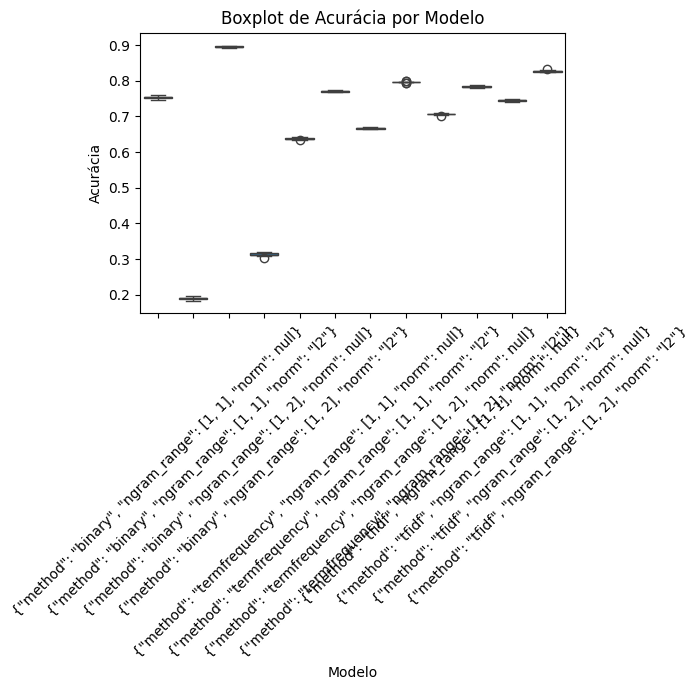

In [8]:
# Gerando boxplots para Acurácia e F1ScoreMacro, agrupados por Modelo
plt.figure(figsize=(7, 7))
sns.boxplot(data=dados, x='Parametros', y='Acuracia')
plt.xticks(rotation=45)
plt.title('Boxplot de Acurácia por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.tight_layout()
plt.show()

In [18]:
import json

# Função para converter string JSON em dicionário Python e formatar o modelo
def format_model(param_str):
    param_dict = json.loads(param_str.replace("'", '"'))  # Substituindo aspas simples por aspas duplas para JSON válido
    model_str = f"{param_dict['method']} {param_dict['ngram_range']} {param_dict.get('norm', 'None')}"
    return model_str

# Aplicando a função para criar uma nova coluna 'Modelo'
dados['Modelo'] = dados['Parametros'].apply(format_model)

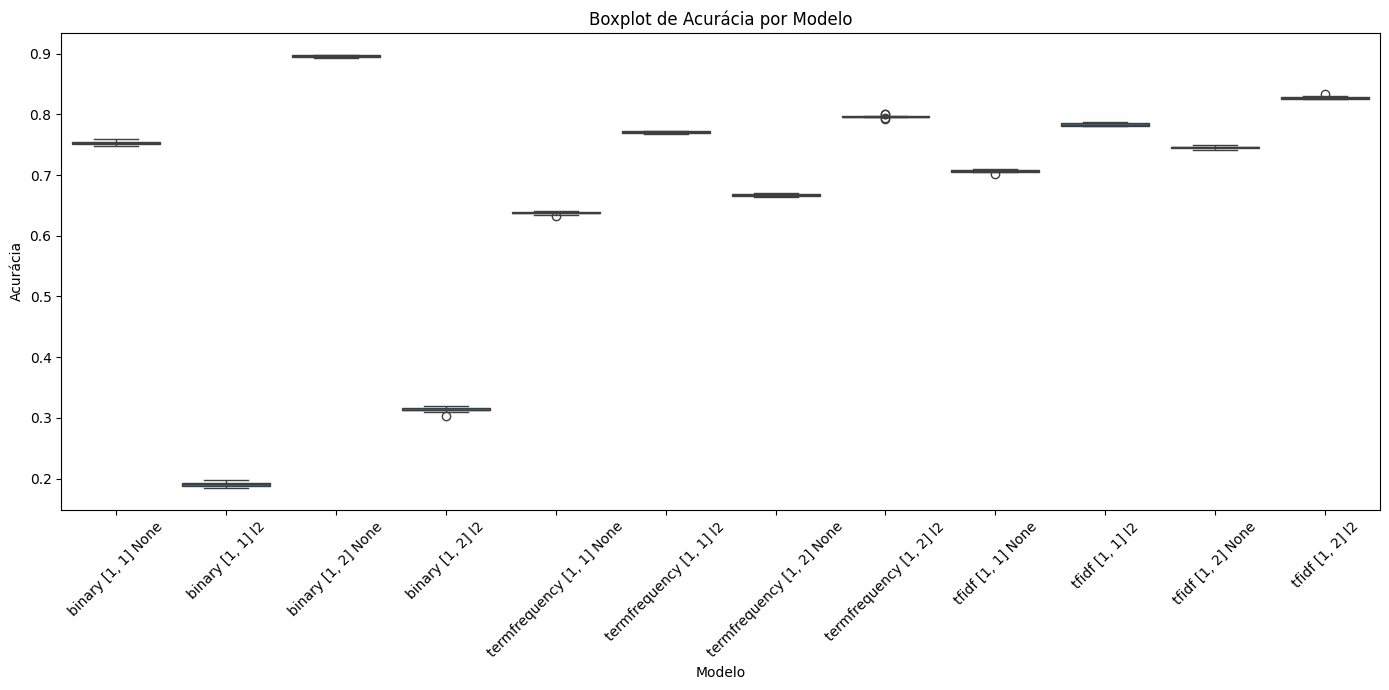

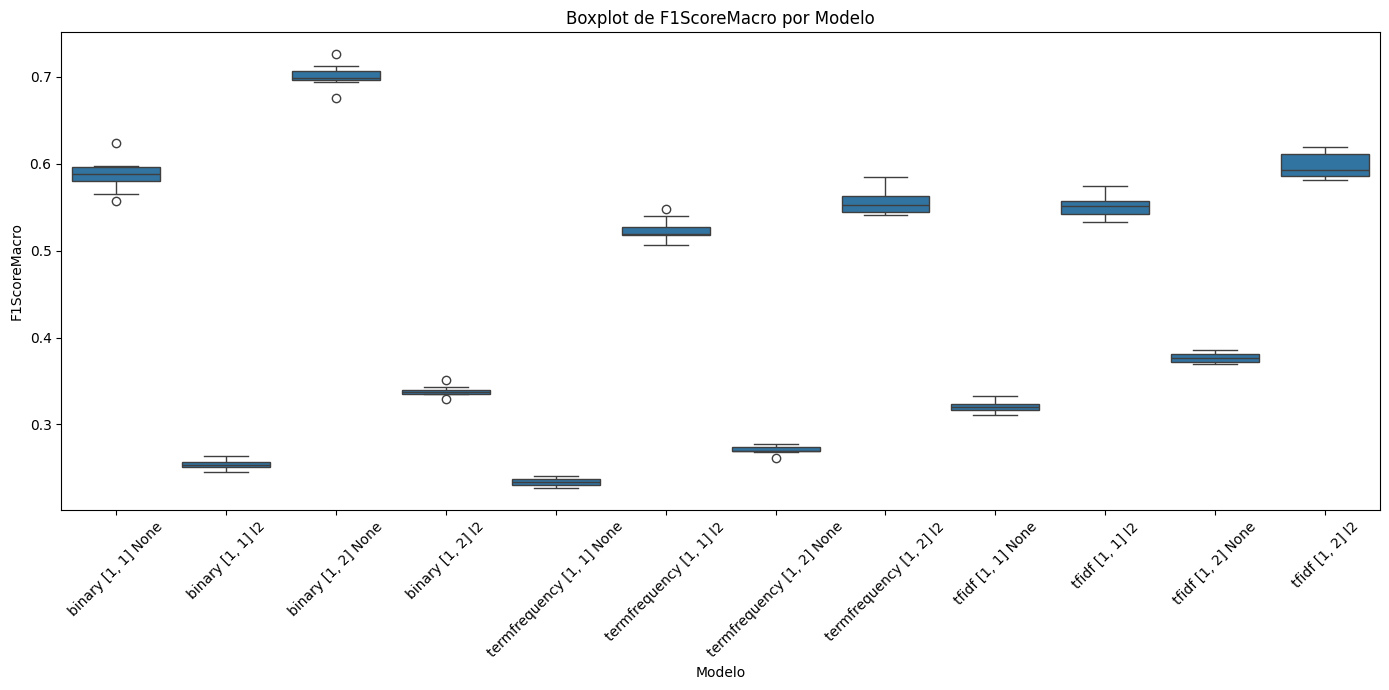

In [32]:
import json

# Corrigindo a função de formatação para decodificar corretamente os valores JSON
def format_model(param_str):
    param_dict = json.loads(param_str)
    model_str = f"{param_dict['method']} {param_dict['ngram_range']} {param_dict.get('norm', 'None')}"
    return model_str

# Aplicando a função para criar uma nova coluna 'Modelo' com a formatação corrigida
dados['Modelo'] = dados['Parametros'].apply(format_model)

# Gerando boxplots para Acurácia e F1ScoreMacro, agrupados por Modelo
plt.figure(figsize=(14, 7))
sns.boxplot(data=dados, x='Modelo', y='Acuracia')
plt.xticks(rotation=45)
plt.title('Boxplot de Acurácia por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=dados, x='Modelo', y='F1ScoreMacro')
plt.xticks(rotation=45)
plt.title('Boxplot de F1ScoreMacro por Modelo')
plt.xlabel('Modelo')
plt.ylabel('F1ScoreMacro')
plt.tight_layout()
plt.show()


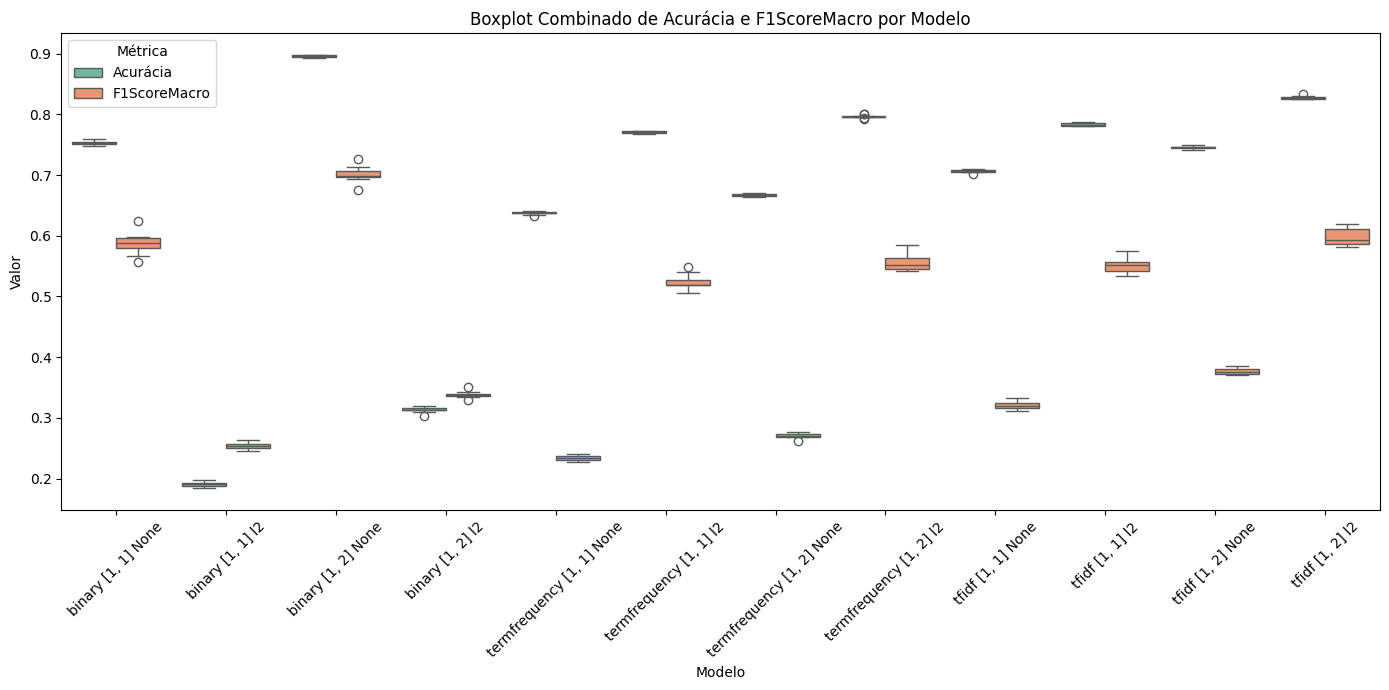

In [33]:
import pandas as pd
# Para combinar os boxplots de Acurácia e F1ScoreMacro no mesmo gráfico, 
# primeiro precisamos remodelar os dados para que possam ser plotados lado a lado.

# Criando um DataFrame para Acurácia e F1ScoreMacro, marcando cada um com uma nova coluna 'Métrica'
df_acuracia = dados[['Modelo', 'Acuracia']].copy()
df_acuracia['Métrica'] = 'Acurácia'

df_f1score = dados[['Modelo', 'F1ScoreMacro']].copy()
df_f1score['Métrica'] = 'F1ScoreMacro'

# Renomeando colunas para combinar
df_acuracia.rename(columns={'Acuracia': 'Valor'}, inplace=True)
df_f1score.rename(columns={'F1ScoreMacro': 'Valor'}, inplace=True)

# Concatenando os DataFrames
df_combinado = pd.concat([df_acuracia, df_f1score])

# Gerando o boxplot combinado
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_combinado, x='Modelo', y='Valor', hue='Métrica', palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot Combinado de Acurácia e F1ScoreMacro por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()


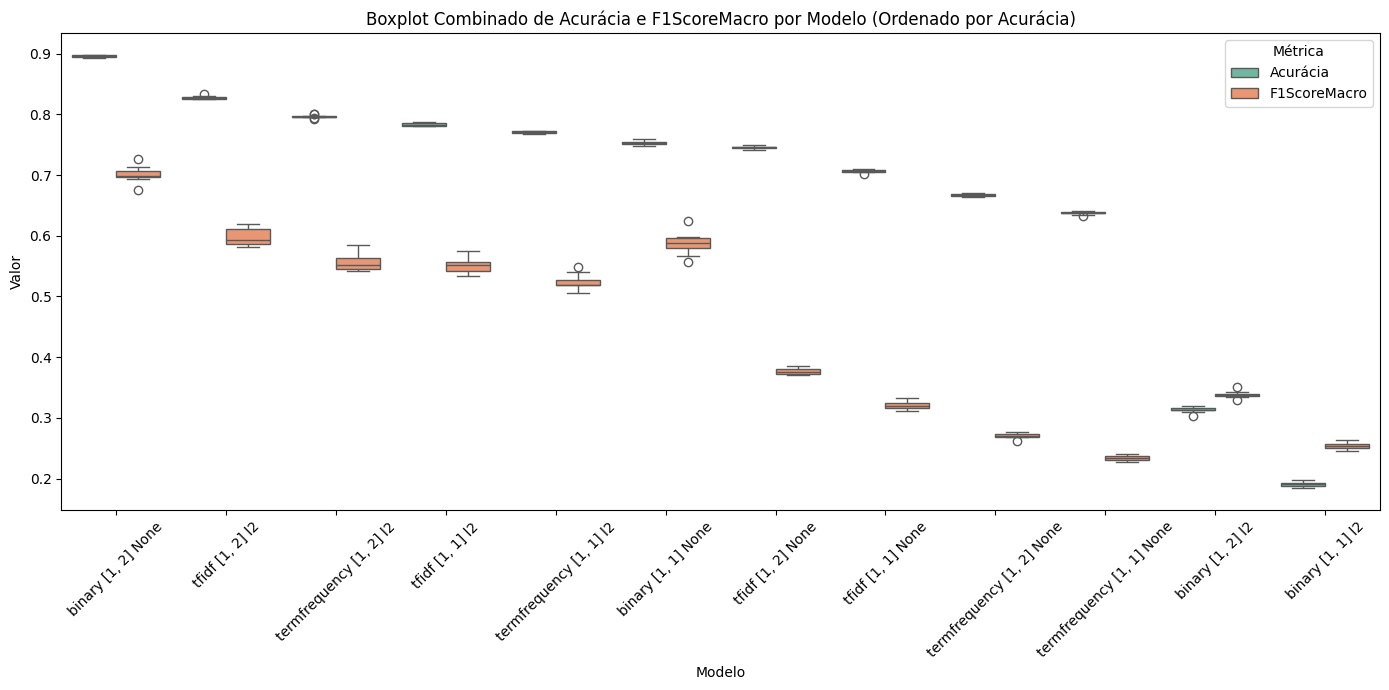

In [34]:
# Para ordenar os modelos de maior para menor acurácia, primeiro calculamos a média da acurácia por modelo
media_acuracia_por_modelo = df_acuracia.groupby('Modelo')['Valor'].mean().reset_index()

# Ordenando os modelos pela média da acurácia em ordem decrescente
modelos_ordenados = media_acuracia_por_modelo.sort_values(by='Valor', ascending=False)['Modelo']

# Usando a ordem dos modelos ordenados para o plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_combinado, x='Modelo', y='Valor', hue='Métrica', palette='Set2', order=modelos_ordenados)
plt.xticks(rotation=45)
plt.title('Boxplot Combinado de Acurácia e F1ScoreMacro por Modelo (Ordenado por Acurácia)')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()


In [37]:
dados.head()

,Parametros,Rodada,Acuracia,F1ScoreMacro,TempoProcessamento,DataExecucao,Estatisticas,Modelo
0,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",0,0.753033,0.589002,9.099309,2024-02-24 23:24:55,"{""quantidade_registros_treino"": 225503, ""quant...","binary [1, 1] None"
1,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",1,0.753193,0.578481,10.125459,2024-02-24 23:25:06,"{""quantidade_registros_treino"": 225503, ""quant...","binary [1, 1] None"
2,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",2,0.749322,0.596320,7.993867,2024-02-24 23:25:14,"{""quantidade_registros_treino"": 225503, ""quant...","binary [1, 1] None"
3,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",3,0.755947,0.623983,7.693273,2024-02-24 23:25:22,"{""quantidade_registros_treino"": 225503, ""quant...","binary [1, 1] None"
4,"{""method"": ""binary"", ""ngram_range"": [1, 1], ""n...",4,0.747326,0.556651,7.811595,2024-02-24 23:25:30,"{""quantidade_registros_treino"": 225503, ""quant...","binary [1, 1] None"


In [40]:
import itertools

# Seu dicionário de parâmetros parece correto.
params = {
    'method': ['binary', 'termfrequency', 'tfidf'],
    'ngram_range': [(1, 1), (1, 2)],
    'norm': [None, 'l2']
}

# A geração de combinações de parâmetros deve funcionar como esperado.
parameter_combinations = experiment_manager.generate_parameter_combinations(params)

# Verificação
print(parameter_combinations)


[{'method': 'binary', 'ngram_range': (1, 1), 'norm': None}, {'method': 'binary', 'ngram_range': (1, 1), 'norm': 'l2'}, {'method': 'binary', 'ngram_range': (1, 2), 'norm': None}, {'method': 'binary', 'ngram_range': (1, 2), 'norm': 'l2'}, {'method': 'termfrequency', 'ngram_range': (1, 1), 'norm': None}, {'method': 'termfrequency', 'ngram_range': (1, 1), 'norm': 'l2'}, {'method': 'termfrequency', 'ngram_range': (1, 2), 'norm': None}, {'method': 'termfrequency', 'ngram_range': (1, 2), 'norm': 'l2'}, {'method': 'tfidf', 'ngram_range': (1, 1), 'norm': None}, {'method': 'tfidf', 'ngram_range': (1, 1), 'norm': 'l2'}, {'method': 'tfidf', 'ngram_range': (1, 2), 'norm': None}, {'method': 'tfidf', 'ngram_range': (1, 2), 'norm': 'l2'}]


In [12]:
display(vectorizer.get_term_document_matrix())
params = {
    'ngram_range':(1,1),
    'norm' : None,
    'method' : 'binary'
}
vectorizer.set_params(**params)
vectorizer.fit(X,y)
display(vectorizer.get_term_document_matrix())

,ARROZ,FEIJAO
1,0.000000,0.00000
1 kg,0.000000,0.00000
1kg,0.000000,0.00000
1kg azulao,0.000000,0.27735
arroz,0.516398,0.00000
arroz fumacence,0.258199,0.00000
arroz tio,0.258199,0.00000
azulao,0.000000,0.27735
azulao feij,0.000000,0.27735
caldao,0.000000,0.27735


,ARROZ,FEIJAO
1,1.0,1.0
1kg,1.0,1.0
arroz,1.0,0.0
azulao,0.0,1.0
caldao,0.0,1.0
carioca,0.0,1.0
feij,0.0,1.0
feijao,0.0,1.0
fumacence,1.0,0.0
joao,1.0,0.0


In [13]:
from sklearn.metrics import accuracy_score, f1_score

Exemplo 1: Inicialização e Ajuste do Vetorizador
Primeiro, inicializamos o ProductVectorizer com configurações específicas e ajustamos o vetorizador a um conjunto de descrições de produtos e suas categorias correspondentes.

In [26]:
import json
def expand_json_columns(df, column_name):
    """
    Expande uma coluna de strings JSON em várias colunas no DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame contendo a coluna de strings JSON.
        column_name (str): Nome da coluna a ser expandida.
    
    Returns:
        pd.DataFrame: DataFrame com as novas colunas expandidas.
    """
    # Converte strings JSON em dicionários
    df[column_name] = df[column_name].apply(json.loads)
    
    # Expande a coluna em várias colunas e concatena com o DataFrame original
    expanded_columns = df[column_name].apply(pd.Series)
    df_expanded = pd.concat([df.drop(column_name, axis=1), expanded_columns], axis=1)
    
    return df_expanded

In [27]:
dados_expandidos = expand_json_columns(dados, 'Parametros')

In [28]:
dados_expandidos

,Rodada,Acuracia,F1ScoreMacro,TempoProcessamento,DataExecucao,Estatisticas,Modelo,method,ngram_range,norm
0,0,0.77,0.585709,0.037139,2024-02-24 22:29:59,"{""quantidade_registros_treino"": 900, ""quantida...","binary [1, 1] l2",binary,"[1, 1]",l2
1,1,0.72,0.577798,0.029171,2024-02-24 22:29:59,"{""quantidade_registros_treino"": 900, ""quantida...","binary [1, 1] l2",binary,"[1, 1]",l2
2,2,0.80,0.643706,0.035234,2024-02-24 22:29:59,"{""quantidade_registros_treino"": 900, ""quantida...","binary [1, 1] l2",binary,"[1, 1]",l2
3,3,0.80,0.647553,0.029501,2024-02-24 22:29:59,"{""quantidade_registros_treino"": 900, ""quantida...","binary [1, 1] l2",binary,"[1, 1]",l2
4,4,0.83,0.661362,0.026002,2024-02-24 22:29:59,"{""quantidade_registros_treino"": 900, ""quantida...","binary [1, 1] l2",binary,"[1, 1]",l2
...,...,...,...,...,...,...,...,...,...,...
105,5,0.86,0.739749,0.043955,2024-02-24 22:30:06,"{""quantidade_registros_treino"": 900, ""quantida...","tfidf [1, 2] l2",tfidf,"[1, 2]",l2
106,6,0.79,0.645238,0.047680,2024-02-24 22:30:06,"{""quantidade_registros_treino"": 900, ""quantida...","tfidf [1, 2] l2",tfidf,"[1, 2]",l2
107,7,0.92,0.799081,0.044226,2024-02-24 22:30:06,"{""quantidade_registros_treino"": 900, ""quantida...","tfidf [1, 2] l2",tfidf,"[1, 2]",l2
108,8,0.87,0.719593,0.053426,2024-02-24 22:30:06,"{""quantidade_registros_treino"": 900, ""quantida...","tfidf [1, 2] l2",tfidf,"[1, 2]",l2


In [6]:
# Suponha que temos as seguintes descrições de produtos e suas categorias
descriptions = [
    "Smartphone Android tela 6.5 melhor preço",
    "Notebook i7 16GB RAM estado de novo",
    "Cafeteira elétrica programável com jarra de vidro",
    "Smart TV 4k 55 polegadas promoção",
    "Tênis de corrida masculino leve confortável"
]

categories = ["Eletrônicos", "Eletrônicos", "Eletrodomésticos", "Eletrônicos", "Vestuário"]

# Inicializando o ProductVectorizer
vectorizer = ProductVectorizer(method='tfidf', ngram_range=(1, 2), norm='l2')

# Ajustando o vetorizador às descrições e categorias
vectorizer.fit(descriptions, categories)


Exemplo 2: Obtendo a Matriz de Termos-Documento
Após ajustar o vetorizador, podemos obter a matriz de termos-documento para analisar quais termos são considerados importantes para cada categoria.


In [7]:
term_document_matrix = vectorizer.get_term_document_matrix()
display(term_document_matrix)


,Vestuário,Eletrodomésticos,Eletrônicos
16gb,0.000000,0.000000,0.162221
16gb ram,0.000000,0.000000,0.162221
4k,0.000000,0.000000,0.162221
4k 55,0.000000,0.000000,0.162221
5,0.000000,0.000000,0.162221
...,...,...,...
tenis,0.316228,0.000000,0.000000
tenis de,0.316228,0.000000,0.000000
tv,0.000000,0.000000,0.162221
tv 4k,0.000000,0.000000,0.162221


Exemplo 3: Transformação e Predição
Podemos também transformar novas descrições em vetores numéricos e realizar predições sobre a categoria a que pertencem.

In [8]:
new_descriptions = [
    "Smartphone 128GB câmera alta resolução",
    "Geladeira frost free 400 litros"
]

# Transformando novas descrições
transformed_descriptions = vectorizer.transform(new_descriptions)

# Realizando predições sobre as categorias das novas descrições
predicted_categories = vectorizer.predict(new_descriptions, out='name')
print(predicted_categories)


['Eletrônicos' 'Vestuário']


Exemplo 4: Predição de Escores
Se quisermos ver os escores de similaridade entre as novas descrições e as categorias existentes, podemos usar o método predict_score.

In [9]:
# Obtendo escores de similaridade
scores = vectorizer.predict_score(new_descriptions)
display(scores.toarray())


array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.16222142, 0.        ]])